In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

from tqdm import tqdm
import gc
from sklearn.metrics import mean_squared_error as mse

In [6]:
# data= pd.read_pickle('final_data.pkl')
data.head()

,state_id,store_id,cat_id,dept_id,item_id,id,d,sales,date,wm_yr_wk,...,lag_28,rolling_mean1,rolling_mean2,rolling_mean3,rolling_mean7,rolling_mean14,rolling_mean21,rolling_mean28,rolling_mean60,rolling_mean90
0,CA,CA_1,HOBBIES,HOBBIES_1,HOBBIES_1_001,HOBBIES_1_001_CA_1_evaluation,1,0,2011-01-29,11101,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CA,CA_1,HOBBIES,HOBBIES_1,HOBBIES_1_001,HOBBIES_1_001_CA_1_evaluation,2,0,2011-01-30,11101,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA,CA_1,HOBBIES,HOBBIES_1,HOBBIES_1_001,HOBBIES_1_001_CA_1_evaluation,3,0,2011-01-31,11101,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,CA,CA_1,HOBBIES,HOBBIES_1,HOBBIES_1_001,HOBBIES_1_001_CA_1_evaluation,4,0,2011-02-01,11101,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,CA,CA_1,HOBBIES,HOBBIES_1,HOBBIES_1_001,HOBBIES_1_001_CA_1_evaluation,5,0,2011-02-02,11101,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#converting object to int and downcasting it
data['d']= data['d'].apply(lambda x: int(x))
data['d']= data['d'].astype(np.int16)

In [11]:
data.head()

,state_id,store_id,cat_id,dept_id,item_id,id,d,sales,date,wm_yr_wk,...,lag_28,rolling_mean1,rolling_mean2,rolling_mean3,rolling_mean7,rolling_mean14,rolling_mean21,rolling_mean28,rolling_mean60,rolling_mean90
0,CA,CA_1,HOBBIES,HOBBIES_1,HOBBIES_1_001,HOBBIES_1_001_CA_1_evaluation,1,0,2011-01-29,11101,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CA,CA_1,HOBBIES,HOBBIES_1,HOBBIES_1_001,HOBBIES_1_001_CA_1_evaluation,2,0,2011-01-30,11101,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA,CA_1,HOBBIES,HOBBIES_1,HOBBIES_1_001,HOBBIES_1_001_CA_1_evaluation,3,0,2011-01-31,11101,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,CA,CA_1,HOBBIES,HOBBIES_1,HOBBIES_1_001,HOBBIES_1_001_CA_1_evaluation,4,0,2011-02-01,11101,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,CA,CA_1,HOBBIES,HOBBIES_1,HOBBIES_1_001,HOBBIES_1_001_CA_1_evaluation,5,0,2011-02-02,11101,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
del data #deleting data
gc.collect() #garbage collection

20

In [2]:
#taking data which is from 2014 and above

# df= data[data['year'] >= 2014].copy()
# df.to_csv("data_from_2014.csv")
# df= pd.read_csv("data_from_2014.csv")

In [ ]:
#taking data which is from 2015 and above
# df2= df[df['year'] >= 2015].copy()
# df2.to_csv("data_from_2015.csv")

In [2]:
data_df= pd.read_csv("data_from_2015.csv")

In [1071]:
del df, data,valid, test
gc.collect()

248

In [3]:
'''splitting to train and test dataset'''

valid = data_df[data_df['d']<1913][['id','d','date','sales', 'revenue']]
test = data_df[data_df['d']>=1913][['id','d','date','sales', 'revenue']]

In [4]:
'''here we are importing sales dataset and we are creating few column orders '''

sales= pd.read_csv('sales_train_evaluation.csv')
d_cols= [col for col in sales.columns if 'd_' in col] 
non_d_cols= [col for col in sales.columns if 'd_' not in col] 

f_cols= [ ("F"+str(i+1)) for i in range(28)]
d_with_f_cols= d_cols+ f_cols

col_order= d_cols + ['level', 'weights']
col_order_with_f_cols= d_with_f_cols+['level', 'weights']
col_order_with_f_cols_without_level= d_with_f_cols+['weights']

In [6]:
valid.head()

,id,d,date,sales,revenue
0,HOBBIES_1_001_CA_1_evaluation,1434,2015-01-01,0,0.0
1,HOBBIES_1_001_CA_1_evaluation,1435,2015-01-02,0,0.0
2,HOBBIES_1_001_CA_1_evaluation,1436,2015-01-03,0,0.0
3,HOBBIES_1_001_CA_1_evaluation,1437,2015-01-04,0,0.0
4,HOBBIES_1_001_CA_1_evaluation,1438,2015-01-05,0,0.0


In [7]:
valid_df= valid.groupby('id')
test_df= test.groupby(['id'])

In [8]:
test_df.head()

,id,d,date,sales,revenue
479,HOBBIES_1_001_CA_1_evaluation,1913,2016-04-24,1,8.38
480,HOBBIES_1_001_CA_1_evaluation,1914,2016-04-25,0,0.00
481,HOBBIES_1_001_CA_1_evaluation,1915,2016-04-26,0,0.00
482,HOBBIES_1_001_CA_1_evaluation,1916,2016-04-27,0,0.00
483,HOBBIES_1_001_CA_1_evaluation,1917,2016-04-28,2,16.76
...,...,...,...,...,...
15488891,FOODS_3_827_WI_3_evaluation,1913,2016-04-24,0,0.00
15488892,FOODS_3_827_WI_3_evaluation,1914,2016-04-25,0,0.00
15488893,FOODS_3_827_WI_3_evaluation,1915,2016-04-26,0,0.00
15488894,FOODS_3_827_WI_3_evaluation,1916,2016-04-27,0,0.00


In [9]:
uid= sales.id.unique() #getting all unique id's from test data

# in kaggle submission file we have to predict last 56 days data from day 1885 for each item
# getting validation ids for each item sales from day 1885 - day 1913
validation_uid= ["_".join(ids.split("_")[:-1] + ["validation"]) for ids in uid] 

In [7]:
print(type(uid))
print(type(validation_uid))

<class 'numpy.ndarray'>
<class 'list'>


### Performance Metric: WRMSSE

In [ ]:
#final
def get_level_12_weights(isvalidation):
    '''calculating last 28 day revenue and weights'''
    #if isvalidation = True, validation data will be from day 1857 -1885
    #if isvalidation= False, validation data will be from day 1885 -1913
    # print("calculating level 12 weights...")
    last_28_day_revenue= []
    weights= [] 
    
    if isvalidation:
        for i in uid: #uid= unique ids
            last_28_day_revenue.append(valid_df.get_group(i)['revenue'].dropna()[-56:-28].values.sum())

        for i in last_28_day_revenue:
            weights.append(i/ sum(last_28_day_revenue))
        
        return weights
    
    else:
        for i in uid: #uid= unique ids
            last_28_day_revenue.append(valid_df.get_group(i)['revenue'].dropna()[-28:].values.sum())

        for i in last_28_day_revenue:
            weights.append(i/ sum(last_28_day_revenue))
                        
        return weights
    
    
def calculate_weights(sales, prediction, aggregation_level, isvalidation):
    '''this function will calculate weights acc to level 12'''
    
#     temp part
    if isvalidation:
        weights= valid_weights
    else:
        weights= test_weights
   
#     https://www.youtube.com/watch?v=7FwITPrBvLI&list=PLu4R9FIFLvWmRgHTH2Br-Di6koS_D7oL7&index=3
    weights= get_level_12_weights(isvalidation) #calling function, calculating weights
    sales['weights']= weights #adding weights
    sales= sales.merge(prediction, on= 'id', how='left') #sales with fcols(i.e prediction data)
    sales2= sales[col_order_with_f_cols_without_level] #creating another dataframe bcoz this dataframe values will be used ahead

    # print('calculating weights aggregate level...')

    #creating new dataframe to store aggregate data weights and revenue
    aggregation_data= pd.DataFrame(sales2.sum()).T
    aggregation_data['level']=1
    aggregation_data['weights']= 1/12
    ag_df= aggregation_data[col_order_with_f_cols]

    #iterating over all the agg levels
    for i in aggregation_level.keys(): #getting weights for all other levels
        temp= sales.groupby(aggregation_level[i]).sum().reset_index(drop=True)
        temp['level']= i
        temp['weights'] /= 12
        temp= temp[col_order_with_f_cols]
        aggregation_data= pd.concat([aggregation_data,temp])

    sale= sales2.copy()
    sale['weights'] /= 12
        
    return sale, aggregation_data



def rmsse(actual, predicted, historical):
    '''this function will calculate the rmsse values'''
    
    actual= np.array(actual)
    predicted= np.array(predicted)
    historical= np.array(historical)
    h= len(actual[0])
    n= len(historical[0])

    numerator= ((actual- predicted)**2).sum(axis=1)
    denominator= (1/n)*((historical[:, 1:] - historical[:, :-1]) ** 2).sum(axis=1)
    rmsses= np.sqrt((numerator/denominator) * (1/ h))
    return rmsses


    
def calculate_wrmsse(sale, aggregation_data, isvalidation):
    '''this function will calculate wrmsse'''
    
    if isvalidation:
        historical_cols= d_cols[:-56]
        actual_cols= d_cols[-56:-28]

        predicted_cols= f_cols
        
    else:
        historical_cols= d_cols[:-28]
        actual_cols= d_cols[-28:]
        predicted_cols= f_cols        

    # print('calculating rmsse...')

    
    rmsse_sale= rmsse(sale[actual_cols], sale[predicted_cols], sale[historical_cols])
    rmsse_agg= rmsse(aggregation_data[actual_cols], aggregation_data[predicted_cols], aggregation_data[historical_cols])
    
    # print('calculating wrmsse...')

    wrmsse_sale= rmsse_sale * sale['weights']
    wrmsse_agg= rmsse_agg * aggregation_data['weights']

    wrmsse= wrmsse_agg.sum() + wrmsse_sale.sum()
    return wrmsse



def wrmsse(sales, prediction, isvalidation):
    '''this function will call all other functions as requires so as to make work easier'''
    
    #all the aggregation levels present in the data
    aggregation_level = {2: ["state_id"], 3: ["store_id"], 4: ["cat_id"], 5: ["dept_id"], 6: ["state_id", "cat_id"], 
                         7: ["state_id", "dept_id"], 8: ["store_id", "cat_id"], 
                         9: ["store_id", "dept_id"], 10: ["item_id"], 11: ["item_id", "state_id"]}
    
    
    weights= 0

    sale, aggregation_data= calculate_weights(sales, prediction, aggregation_level, isvalidation)
    wrmsses=calculate_wrmsse(sale, aggregation_data, isvalidation)
    
    return wrmsses


### Baseline Model 1: all zeros

In [12]:
def create_dataframe(forecast_days): #parameters= no of days we want to forecast for 
    '''this function will create a dataframe with all NaN values'''
    cols= ['F'+str(day+1) for day in range(forecast_days)]
    target= pd.DataFrame(columns= ['id']+cols)
    target['id']= uid
    return target

def create_dataframe_for_kaggle(forecast_days):#parameters= no of days we want to forecast for 
    '''this function will create a dataframe with all NaN values, structure will be same as whats required by kaggle'''
    cols= ['F'+str(day+1) for day in range(forecast_days)]
    target= pd.DataFrame(columns= ['id']+cols)
    validation_uid= ["_".join(ids.split("_")[:-1] + ["validation"]) for ids in uid] 
    target['id']= validation_uid + list(uid)
    return target

In [623]:
'''creating first simple baseline model which forecasts zero sales for each product'''
prediction= create_dataframe(28).fillna(0) #calling function parameter= window size
prediction.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [624]:
wrmsse= wrmsse(sales3, prediction, False)
print('wrmsse: ',wrmsse)

calculating weights aggregate level...
calculating rmsse...
calculating wrmsse...
wrmsse:  5.36084667536525


Here wrmsse = 5.35

#### For Kaggle

In [634]:
all_zero_prediction= create_dataframe_for_kaggle(28).fillna(0)
all_zero_prediction

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
all_zeros_prediction.to_csv("all_zeros_prediction.csv")

#### Kaggle score

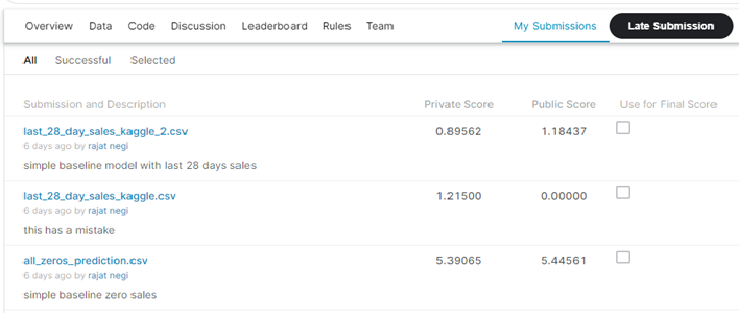

### Baseline Model 2: last 28 days values

In [635]:
def last_28(data, window, isvalidation): #parameters= dataframe, window size(here 28), is data for validation or evaluation
    '''this function will forecast sales of products as the last 28 days sales'''
    '''this function will forecast for validation and evaluation data'''
    data_28= data.groupby(['id'])
    uid= test.id.unique()
    result=[]
    if isvalidation:
        for i in uid:
            result.append(data_28.get_group(i)['sales'].values[-window:])
            
        cols= ['F'+str(day+1) for day in range(window)]
        result= pd.DataFrame(result, columns=cols)
        val_uid= ["_".join(ids.split("_")[:-1] + ['validation']) for ids in uid]
        result['id']= val_uid
        updated_cols= ['id'] + cols
        result= result[updated_cols]
        return result

    else:
        for i in uid:
            result.append(data_28.get_group(i)['sales'].values[-window:])
        

        cols= ['F'+str(day+1) for day in range(window)]
        result= pd.DataFrame(result, columns=cols )

        result['id']= uid
        updated_cols= ['id'] + cols
        result= result[updated_cols]
        return result

In [640]:
last_28_validation= last_28(valid, 28, True) #this will give forecast for validation data
last_28_validation.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,1,1,0,0,0,0,0,1,0,...,1,1,3,0,1,1,1,3,0,1
1,HOBBIES_1_002_CA_1_validation,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,1,0,...,2,2,1,2,1,1,1,0,1,1
3,HOBBIES_1_004_CA_1_validation,6,0,0,0,0,3,1,2,1,...,0,1,0,5,4,1,0,1,3,7
4,HOBBIES_1_005_CA_1_validation,0,1,0,4,4,0,1,4,0,...,1,2,1,1,0,1,1,2,2,2


In [629]:
wrmsse= wrmsse(sales3, last_28_validation, False)
print('wrmsse for last 28 days prediction is: ',wrmsse)

calculating weights aggregate level...
calculating rmsse...
calculating wrmsse...
wrmsse for last 28 days prediction is:  1.1630022345176658


#### For kaggle

In [637]:
last_28_evaluation= last_28(test,28, False)# this will get forecast for evaluation data
last_28_evaluation.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_evaluation,0,0,0,2,0,3,5,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,0,1,0,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,0,0,1,1,0,2,1,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,0,0,1,2,4,1,6,4,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,1,0,2,3,1,0,3,2,3,...,0,0,0,2,1,0,0,2,1,0


In [638]:
last_28_day_sales_kaggle= pd.concat([last_28_validation, last_28_evaluation]) #c0ncatinating both forecast
last_28_day_sales_kaggle

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,1,1,0,0,0,0,0,1,0,...,1,1,3,0,1,1,1,3,0,1
1,HOBBIES_1_002_CA_1_validation,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,1,0,...,2,2,1,2,1,1,1,0,1,1
3,HOBBIES_1_004_CA_1_validation,6,0,0,0,0,3,1,2,1,...,0,1,0,5,4,1,0,1,3,7
4,HOBBIES_1_005_CA_1_validation,0,1,0,4,4,0,1,4,0,...,1,2,1,1,0,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,0,0,0,2,2,0,0,0,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,0,0,1,1,0,2,1,1,0,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,1,3,0,1,2,1,0,2,1,...,1,1,1,4,6,0,1,1,1,0


In [ ]:
last_28_day_sales_kaggle.to_csv('last_28_day_sales_kaggle_2.csv', index=False)

#### kaggle score

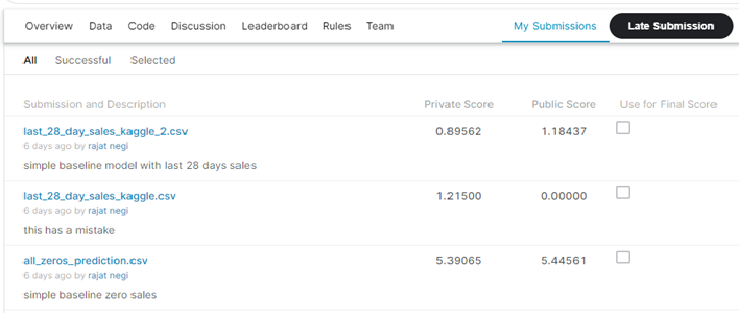

## Moving Average

In [935]:
sales_df= pd.read_csv("sales_train_evaluation.csv")
sales_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [962]:
sales_df2= sales_df.copy()
sales_df3= sales_df.copy()

In [974]:
def moving_average(data, isvalidation):
    '''this function will take previous 28 days data and average it and that will be our prediction for next day'''
    if isvalidation:
        for i in range(28):
            cols= data.columns[-56:-28]
            xx= np.array(data[cols])
            data['F'+str(i+1)]= list(map(int, np.round(xx.sum(axis=1)/28, 0)))
        data['id']= data['id'].apply(lambda x: "_".join(x.split("_")[:-1]+ ['validation']))
        
        return data[['id']+f_cols]
            
    else:
        for i in range(28):
            cols= data.columns[-28:]
            xx= np.array(data[cols])
            data['F'+str(i+1)]= list(map(int, np.round(xx.sum(axis=1)/28, 0)))
            
        return data[['id']+f_cols]

In [978]:
sales_df2= sales_df.copy()
prediction_validation= moving_average(sales_df2,True)

In [979]:
prediction_validation

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,HOBBIES_1_004_CA_1_validation,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,HOBBIES_1_005_CA_1_validation,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
30486,FOODS_3_824_WI_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30487,FOODS_3_825_WI_3_validation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
30488,FOODS_3_826_WI_3_validation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,2,1,1


In [970]:
wrmsse(sales_df3, prediction_validation, False)

calculating weights aggregate level...
calculating rmsse...
calculating wrmsse...


1.1787836923686847

We get a WRMSSE of 1.17

#### For Kaggle

In [976]:
sales_df2= sales_df.copy()
prediction_evaluation= moving_average(sales_df2,False)

In [977]:
prediction_evaluation

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_evaluation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,HOBBIES_1_002_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,HOBBIES_1_004_CA_1_evaluation,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,HOBBIES_1_005_CA_1_evaluation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
30486,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30487,FOODS_3_825_WI_3_evaluation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
30488,FOODS_3_826_WI_3_evaluation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [981]:
moving_avg_kaggle= pd.concat([prediction_validation, prediction_evaluation]) #c0ncatinating both forecast
moving_avg_kaggle

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,HOBBIES_1_004_CA_1_validation,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,HOBBIES_1_005_CA_1_validation,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
30486,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30487,FOODS_3_825_WI_3_evaluation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
30488,FOODS_3_826_WI_3_evaluation,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [982]:
moving_avg_kaggle.to_csv("moving_avg_kaggle.csv", index= False)

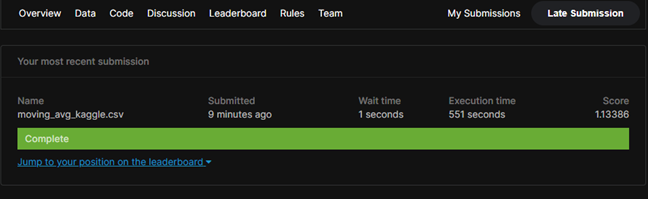

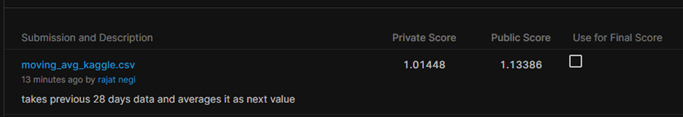

#### Summary

- From the above baseline models we can see that using the past 28 days sales as the next 28 days sales gives us the best score. so now all the complex models we build now should perform better than these baseline models.